### 我们使用最简单的线性模型：
## y=kx+b+ε

### 其中k是斜率，b是截距，最后的ε是测量误差。
### 现在我们假设k=3，b=-2，然后我们据此产生100个模拟的数据：


In [ ]:
import numpy as np
true_b = -1
true_k = 3
N = 100
# 数据生成
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_k * x + epsilon

### 随后，我们需要把这些数据分成2部分，一部分用于训练，另外一部分用于验证训练的效果。在此，我们随机抽取80个数据作为训练数据，剩下20个数据作为验证数据：

In [ ]:
# 索引乱序
idx = np.arange(N)
np.random.shuffle(idx)

# 使用80个随机的数据用作训练
train_idx = idx[:int(N*.8)]
# 剩余的20个数据用作验证
val_idx = idx[int(N*.8):]

# 产生训练和验证数据集
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [ ]:
import matplotlib.pyplot as plt
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([-1, 2.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([-1, 2.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

In [ ]:
figure1(x_train, y_train, x_val, y_val)

### **随机初始化。** 我们需要计算（或者说是训练）的参数是k和b。一开始，通过随机函数给出一个随机的初始值：
> #### 一开始指定的一个随机数种子23，之所以这么做是好让你产生的随机数和本书相同，以便于学习和对比。

In [ ]:
np.random.seed(23)
k = np.random.randn()
b = np.random.randn()
print('k = ', k, 'b = ', b)

### 计算模型的预测值。在此时的k和b的值的情形下，对于训练数据里的每一个x值，可以计算得到一个y值，记为yhat

In [ ]:
yhat = k * x_train + b

In [ ]:
def figure2(x_train, y_train, b, w, color='k'):
    # Generates evenly spaced x feature
    x_range = np.linspace(0, 1, 101)
    # Computes yhat
    yhat_range = b + w * x_range

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim([-1, 2])

    # Dataset
    ax.scatter(x_train, y_train)
    # Predictions
    ax.plot(x_range, yhat_range, label='Model\'s predictions', c=color, linestyle='--')

    # Annotations
    ax.annotate('b = {:.4f} k = {:.4f}'.format(b, w), xy=(.2, 0), c=color)
    ax.legend(loc=0)
    fig.tight_layout()
    return fig, ax


def figure3(x_train, y_train, b, w):
    fig, ax = figure2(x_train, y_train, b, w)
    
    # First data point
    x0, y0 = x_train[0][0], y_train[0][0]
    # First data point
    ax.scatter([x0], [y0], c='r')
    # Vertical line showing error between point and prediction
    ax.plot([x0,x0], [(b + w * x0), y0 - .03], c='r', linewidth=2, linestyle='--')
    ax.arrow(x0, y0 - .03, 0, .03, color='r', shape='full', lw=0, length_includes_head=True, head_width=.03)
    yy = b + w * x0 + .05
    ax.arrow(x0, yy, 0, -0.03, color='r', shape='full', lw=0, length_includes_head=True, head_width=.03)
    # Annotations
    ax.annotate(r'$error_0$', xy=(.85, 1.2))

    fig.tight_layout()
    return fig, ax

figure3(x_train, y_train, b, k)

## 计算损失
> ### 在机器学习中，我们把所有的残差进行统计分析，称为计算损失。另一方面，损失是一组数据的某种残差的聚合。接下来我们应该根据损失来调整参数k和b使得损失减小。因此我们似乎应该计算所有数据点（N个）的损失。计算所有(N)个数据点的损失是一种很稳定的做法，但也是一种很慢的做法。为了速度，我们可以牺牲一些稳定性。我们可以通过从N中随机选择(不重复)n的子集来完成每次损失的计算。根据选择的不同，分为以下3中情况，Batch、mini-Batch，和随机梯度下降（Stochastic Gradient Descent，SGD）：

+ ### 如果使用训练集中的所有点(n = n)来计算损失，那么就是Batch梯度下降；
+ ### 如果每次使用单个点(n = 1)，它将是随机梯度下降(SGD)；
+ ### 在1和n之间的任何其他(n)都表示mini-Batch梯度下降。

> ### 对于回归问题，损失由均方差函数(MSE)给出；也就是所有平方差的平均值。也就是说，所有标签（label y）和预测结果（kx+b）之差的平方的平均值：


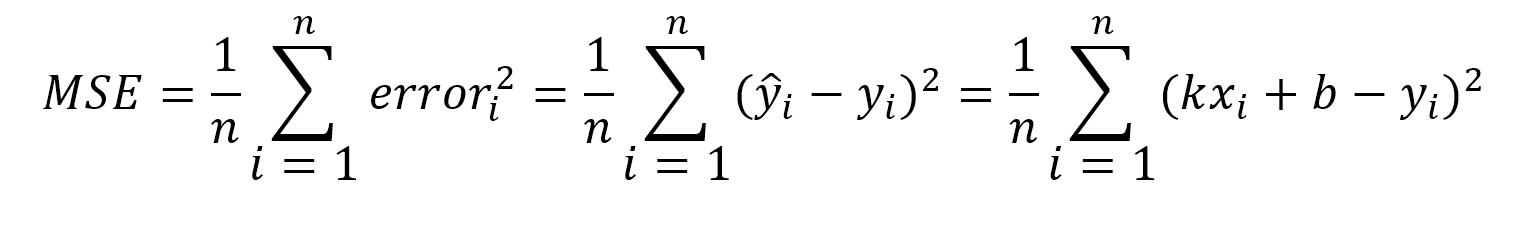

In [ ]:
error = (yhat - y_train)
loss = (error ** 2).mean()
print(loss)

### 现在，我们的目标是调整k和b的值，使得损失减少。也就是说，从当前位置，沿着MSE函数的梯度下降的方向来调整k和b的值。为此，我们先需要求出MSE的梯度。由于MSE是关于k和b的二元函数，因此梯度将是一个偏导数：

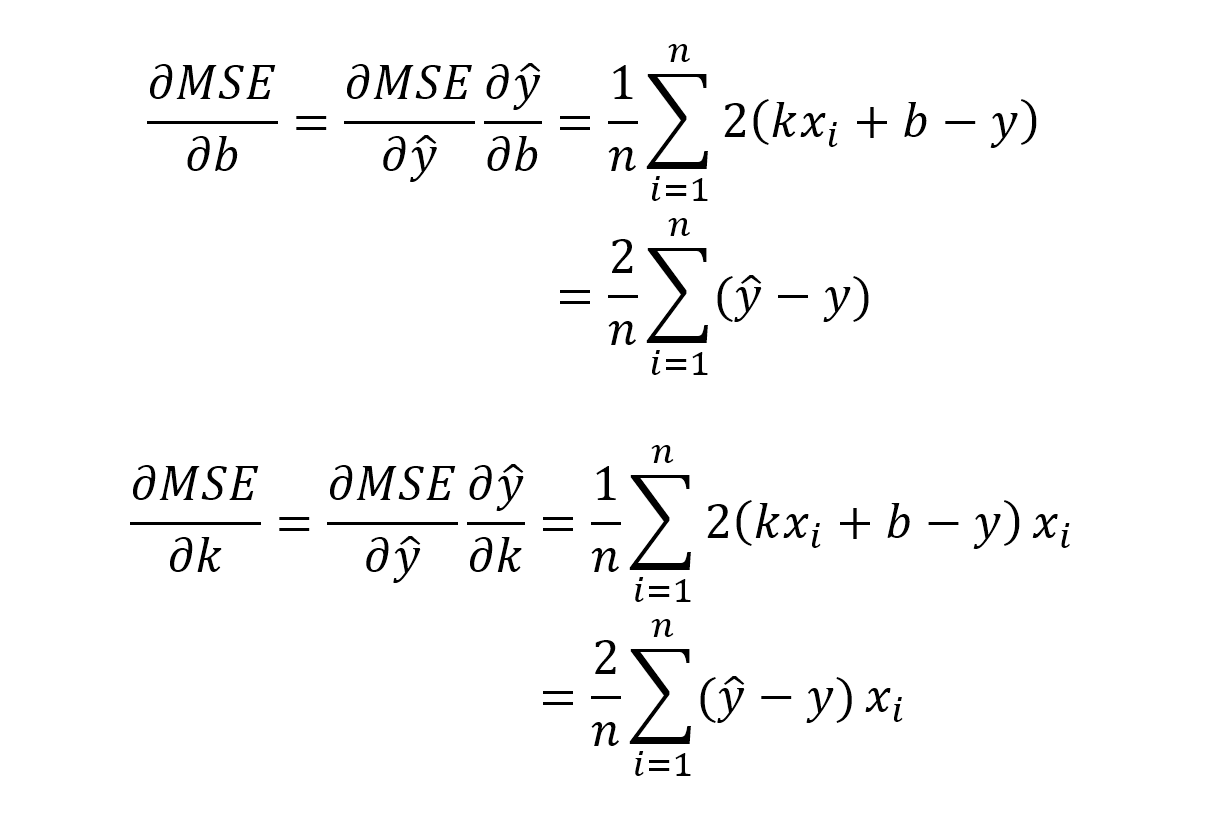

In [ ]:
b_grad = 2*error.mean()
k_grad = 2*(x_train * error).mean()
print('b_grad = ', b_grad, 'k_grad = ', k_grad)


### 参数更新。
### 计算出梯度之后，就可以更新k和b这两个参数了。当然更新的目的是是的loss减小：


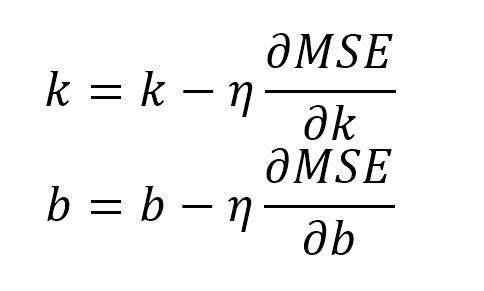

In [ ]:
b = b-0.1*b_grad
k = k-0.1*k_grad
print('b=',b,'k=',k)

In [ ]:
def figure4(x_train, y_train, b, w):
    np.random.seed(23)
    k_initial = np.random.randn()
    b_initial = np.random.randn()

    fig, ax = figure2(x_train, y_train, b_initial, k_initial)

    # Generates evenly spaced x feature
    x_range = np.linspace(0, 1, 101)
    # Model's predictions for updated paramaters
    yhat_range = b + w * x_range
    # Updated predictions
    ax.plot(x_range, yhat_range, label='Using parameters\nafter one update', c='g', linestyle='--')
    # Annotations
    ax.annotate('b = {:.4f} k = {:.4f}'.format(b, w), xy=(.2, .5), c='g')

    fig.tight_layout()
    return fig, ax

figure4(x_train, y_train, b, k)

In [ ]:
# Step 1 初始化参数
np.random.seed(23)
b = np.random.randn()
k = np.random.randn()

print(b, k)

# 学习率
lr = 0.1
# epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 2 预测输出
    yhat = b + k * x_train
    
    # Step 3 计算损失
    error = (yhat - y_train)
   
    loss = (error ** 2).mean()
    
    # Step 3 计算梯度
    b_grad = 2 * error.mean()
    k_grad = 2 * (x_train * error).mean()
    
    # Step 4 更新参数
   
    b = b - lr * b_grad
    k = k - lr * k_grad
    
print(b, k)

In [ ]:
figure2(x_train, y_train, b, k)